<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/task_9_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# shAI Training 2022 | Level 1


## Task#9 (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [3]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784', as_frame=False)
x, y = mnist["data"], mnist["target"]

#### peek at one digit

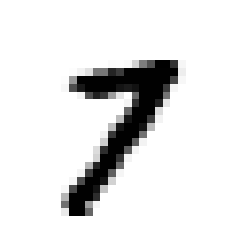

In [4]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [7]:
# CODE HERE
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance 

In [9]:
# CODE HERE
des_arr = sgd_clf.decision_function([some_digit])
des_arr

array([[-46963.3014845 , -36956.8667103 , -14390.73165525,
        -13246.56826449, -23608.46555151, -14753.19730241,
        -37490.67249474,  10134.92485388,  -5475.38036705,
        -10971.45906423]])

#### find highest score 

In [11]:
# CODE HERE
np.argmax(des_arr)

7

#### list the target classes

In [19]:
# CODE HERE
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

#### Find the the target class for 7

In [20]:
# CODE HERE
# if you got stuck use GOOGLE
y[40000]

'7'

#### Force ScikitLearn to use one-versus-one

In [21]:
from sklearn.multiclass import OneVsOneClassifier

In [22]:
# CODE HERE
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

array(['7'], dtype=object)

#### find how many classifier OvO used

In [23]:
# CODE HERE
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [26]:
# CODE HERE
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array(['7'], dtype=object)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [27]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.01]])

#### Find accurcy using cross validation score ()

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
# CODE HERE
cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96625, 0.96715, 0.96515])

In [32]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.86385, 0.8656 , 0.8719 ])

#### to get better accurcy try scaling input

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# CODE HERE
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89795, 0.9022 , 0.8962 ])

## Error Analysis

#### Take a look at the confusion matrix

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [36]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5586,    0,   11,    8,    8,   40,   29,    4,  236,    1],
       [   0, 6413,   43,   22,    3,   42,    5,    7,  197,   10],
       [  19,   27, 5248,   87,   67,   20,   59,   41,  381,    9],
       [  27,   20,  110, 5244,    0,  191,   21,   41,  409,   68],
       [  10,   16,   40,    8, 5204,   11,   36,   22,  343,  152],
       [  27,   16,   26,  148,   46, 4454,   82,   17,  545,   60],
       [  32,   17,   39,    1,   43,   88, 5548,    7,  142,    1],
       [  23,   10,   51,   25,   52,   13,    4, 5694,  192,  201],
       [  18,   64,   41,   91,    3,  120,   27,    9, 5441,   37],
       [  25,   20,   29,   60,  118,   33,    1,  172,  396, 5095]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

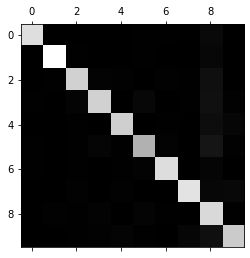

In [37]:
# CODE HERE
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [38]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

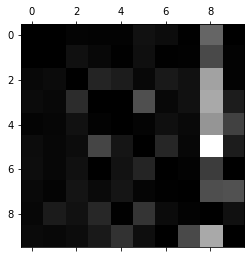

In [39]:
# CODE HERE
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [40]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

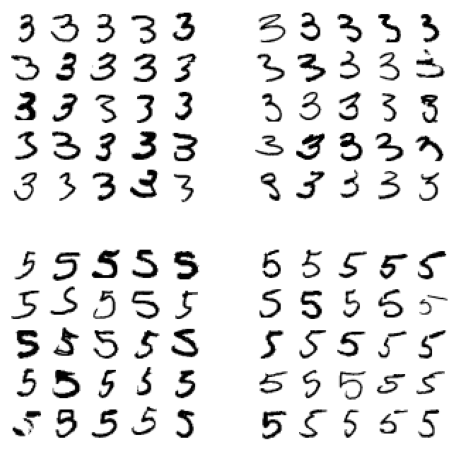

In [41]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [42]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [43]:
# CODE HERE
knn_clf.predict([some_digit])

array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [44]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### Let’s take a peek at an image from the test set

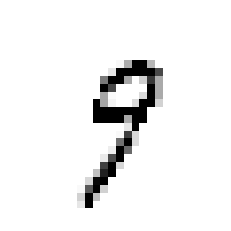

In [46]:
# CODE HERE
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[1000]])
plot_digits(clean_digit)

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club